Data Wrangling - II

Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.

<hr>

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import plotly.express as px
import seaborn as sns

In [22]:
temp = pd.read_csv('exam.csv')
data = pd.DataFrame(temp)
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.

In [23]:
data.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.

In [24]:
data.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [25]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


<AxesSubplot:>

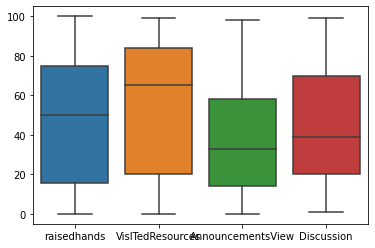

In [26]:
sns.boxplot(data) 

filtered outliers and remove the outliers

In [27]:
data['Discussion'].describe()

count    480.000000
mean      43.283333
std       27.637735
min        1.000000
25%       20.000000
50%       39.000000
75%       70.000000
max       99.000000
Name: Discussion, dtype: float64

In [31]:
lower , upper = data['Discussion'].quantile([0.05,0.90])

In [34]:
outliers = data[(data['Discussion'] > upper) | (data['Discussion']<lower)]
outliers.shape

(70, 17)

In [37]:
outliers_remove = data[(data['Discussion'] < upper) & (data['Discussion'] > lower)]
outliers_remove.shape

(400, 17)

3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.

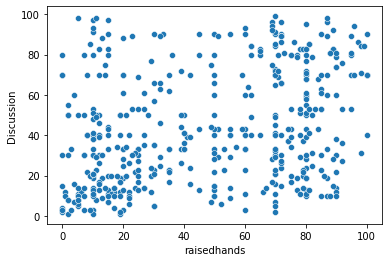

In [28]:
sns.scatterplot(data=data, x="raisedhands", y="Discussion")
plt.show() # scale not done

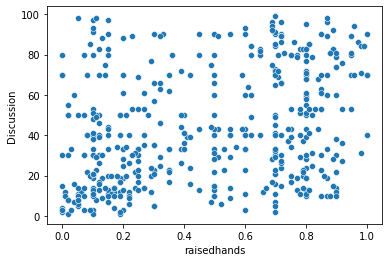

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data["raisedhands"] = scaler.fit_transform(data[["raisedhands"]])
sns.scatterplot(data=data, x="raisedhands", y="Discussion")
plt.show()  #scale is done 01

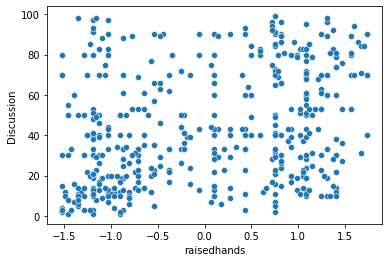

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[['raisedhands']]=sc.fit_transform(data[['raisedhands']])
sns.scatterplot(data=data, x="raisedhands", y="Discussion")
plt.show()  #scale is done 02